In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Set 준비

In [4]:
train_data = pd.read_csv('train_set.csv', index_col = 0)
test_data = pd.read_csv('test_set.csv', index_col = 0)

In [5]:
train_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
1,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
2,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
3,2021-01-06,1942.60,1012.55,4420.99,1484.83,2555.18,3440.97,11108.13
4,2021-01-07,1872.97,694.47,4080.54,1488.01,2740.90,3018.87,11615.35
...,...,...,...,...,...,...,...,...
1241,2024-12-26,2548.80,1332.04,5217.14,1161.23,1487.55,11351.61,11099.88
1242,2024-12-27,3642.66,1545.93,4674.20,1200.78,1503.53,10328.21,11454.85
1243,2024-12-28,2941.62,1325.48,4317.21,1292.75,1396.15,12691.50,11325.36
1244,2024-12-30,2287.54,2270.71,4904.38,1167.73,1566.44,10164.39,11842.47


In [6]:
test_data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2025-01-02,4832.75,1217.56,5843.78,1408.03,1580.95,12188.33,14781.40
1,2025-01-03,3110.80,2309.07,4613.04,1281.47,1683.65,12823.14,11304.91
2,2025-01-04,2466.66,2308.51,4664.59,1355.17,1567.71,11395.75,11444.51
3,2025-01-06,3728.57,1671.05,4721.10,1308.74,1659.86,10287.87,12001.80
4,2025-01-07,2640.44,1926.03,5034.74,1430.88,1837.39,8227.55,10084.76
...,...,...,...,...,...,...,...,...
110,2025-05-15,1948.11,1421.56,3806.53,829.99,797.14,8056.35,7504.12
111,2025-05-16,2310.72,1936.55,4228.17,839.24,805.38,5142.38,7484.80
112,2025-05-17,10743.00,992.69,4385.40,952.11,811.21,6541.44,6750.44
113,2025-05-19,7946.91,1060.81,5659.89,903.22,1089.97,4668.99,7030.72


In [7]:
# 1월부터 4월까지의 데이터를 활용해 test 진행 예정이기 때문에 5월 데이터는 삭제
test_data['date'] = pd.to_datetime(test_data['date'])
test_data = test_data[test_data['date'].dt.month != 5]
test_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
93,2025-04-25,3760.42,2004.59,4116.21,1249.71,670.54,6485.02,5548.51
94,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
95,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
96,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32
97,2025-04-30,4740.45,1109.83,4438.43,1149.61,780.90,5330.21,5582.41


## EDA 진행

In [8]:
print(train_data.info())
print('=' * 50)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1246 non-null   object 
 1   cabbage    1240 non-null   float64
 2   radish     1241 non-null   float64
 3   garlic     1239 non-null   float64
 4   onion      1239 non-null   float64
 5   daikon     1244 non-null   float64
 6   cilantro   1236 non-null   float64
 7   artichoke  1239 non-null   float64
dtypes: float64(7), object(1)
memory usage: 87.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       98 non-null     datetime64[ns]
 1   cabbage    98 non-null     float64       
 2   radish     97 non-null     float64       
 3   garlic     98 non-null     float64       
 4   onion      97 non-null     float64       
 5   daikon    

In [9]:
print(train_data.isnull().sum())
print('=' * 50)
print(test_data.isnull().sum())

date          0
cabbage       6
radish        5
garlic        7
onion         7
daikon        2
cilantro     10
artichoke     7
dtype: int64
date         0
cabbage      0
radish       1
garlic       0
onion        1
daikon       0
cilantro     0
artichoke    0
dtype: int64


- Nan 값이 존재. 해당 값들을 해당 월의 평균 값으로 대체

In [10]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year_month'] = train_data['date'].dt.to_period('M')

test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year_month'] = test_data['date'].dt.to_period('M')

rows = train_data.isna().any(axis=1)
print(train_data[rows].head())

          date  cabbage  radish   garlic   onion   daikon  cilantro  \
31  2021-02-07   553.20  356.68      NaN  1030.0  3772.44       NaN   
223 2021-09-20  2985.97  576.81  6959.62     NaN  1441.37   1706.55   
336 2022-02-03  1668.21  435.42  6796.20   450.0  1904.38       NaN   
411 2022-05-01      NaN     NaN  8100.00     NaN      NaN       NaN   
424 2022-05-15      NaN     NaN  5440.00     NaN      NaN       NaN   

     artichoke year_month  
31     7213.89    2021-02  
223    5121.82    2021-09  
336   11550.61    2022-02  
411        NaN    2022-05  
424        NaN    2022-05  


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15624\2985041201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['date'] = pd.to_datetime(test_data['date'])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15624\2985041201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['year_month'] = test_data['date'].dt.to_period('M')


In [11]:
# test 데이터 속 cilantror != cilantro
test_data.columns = train_data.columns

features = train_data.drop(columns=['date','year_month']).columns

for feature in features:
    #------------train data--------------
    train_avg_month = train_data.groupby('year_month')[feature].mean().round(2)
    train_rows_NaN_feature = train_data[train_data[feature].isna()].index
    
    for idx in train_rows_NaN_feature:
        year_month = train_data.at[idx, 'year_month']
        if pd.notna(train_avg_month.get(year_month)):  
            train_data.at[idx, feature] = train_avg_month[year_month]
            
    #------------test data--------------
    test_avg_month = test_data.groupby('year_month')[feature].mean().round(2)
    test_rows_NaN_feature = test_data[test_data[feature].isna()].index
    
    for idx in test_rows_NaN_feature:
        year_month = test_data.at[idx, 'year_month']
        if pd.notna(test_avg_month.get(year_month)):  
            test_data.at[idx, feature] = test_avg_month[year_month]
   

In [12]:
print(train_data[rows].head())

          date  cabbage  radish   garlic    onion   daikon  cilantro  \
31  2021-02-07   553.20  356.68  4415.75  1030.00  3772.44   4243.76   
223 2021-09-20  2985.97  576.81  6959.62   893.28  1441.37   1706.55   
336 2022-02-03  1668.21  435.42  6796.20   450.00  1904.38   4907.77   
411 2022-05-01  2429.81  918.75  8100.00   635.36  1295.08   5041.66   
424 2022-05-15  2429.81  918.75  5440.00   635.36  1295.08   5041.66   

     artichoke year_month  
31     7213.89    2021-02  
223    5121.82    2021-09  
336   11550.61    2022-02  
411    6634.13    2022-05  
424    6634.13    2022-05  


In [13]:
train_data.drop(columns='year_month', inplace=True)
test_data.drop(columns='year_month', inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15624\4112785324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns='year_month', inplace=True)


In [14]:
print(train_data.isnull().sum())
print('=' * 50)
print(test_data.isnull().sum())

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64
date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64


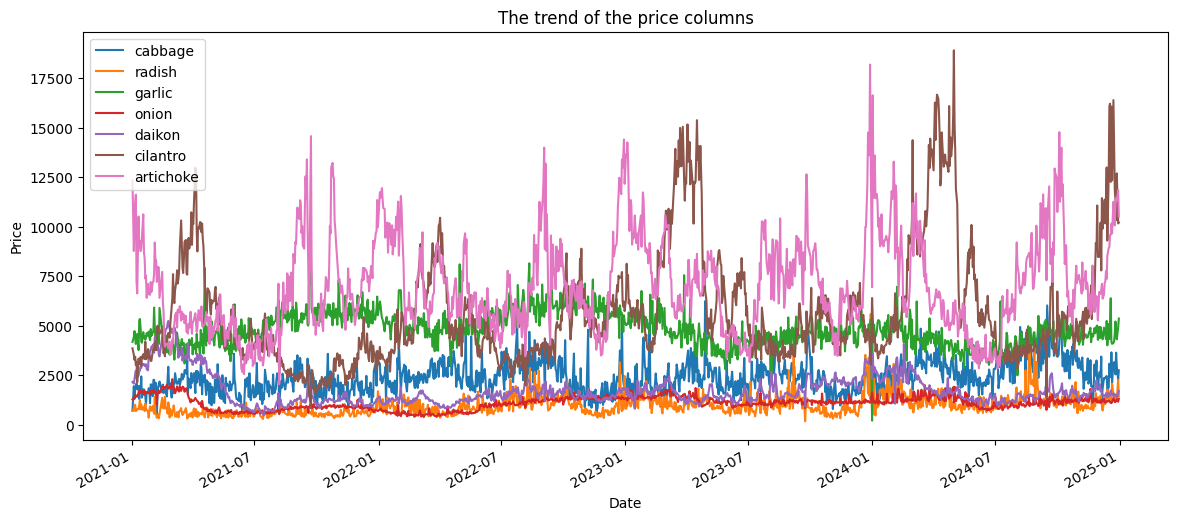

In [15]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

train_data.set_index('date').plot(figsize = (14, 6))

plt.title("The trend of the price columns")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [16]:
def calculate_rolling_mean(data, window = 7):
    data_rolling_mean = data.drop(columns = ['date']).rolling(window = window, min_periods = 1).mean()

    data_rolling_mean['date'] = data['date']

    return data_rolling_mean

train_data_roll = calculate_rolling_mean(train_data)

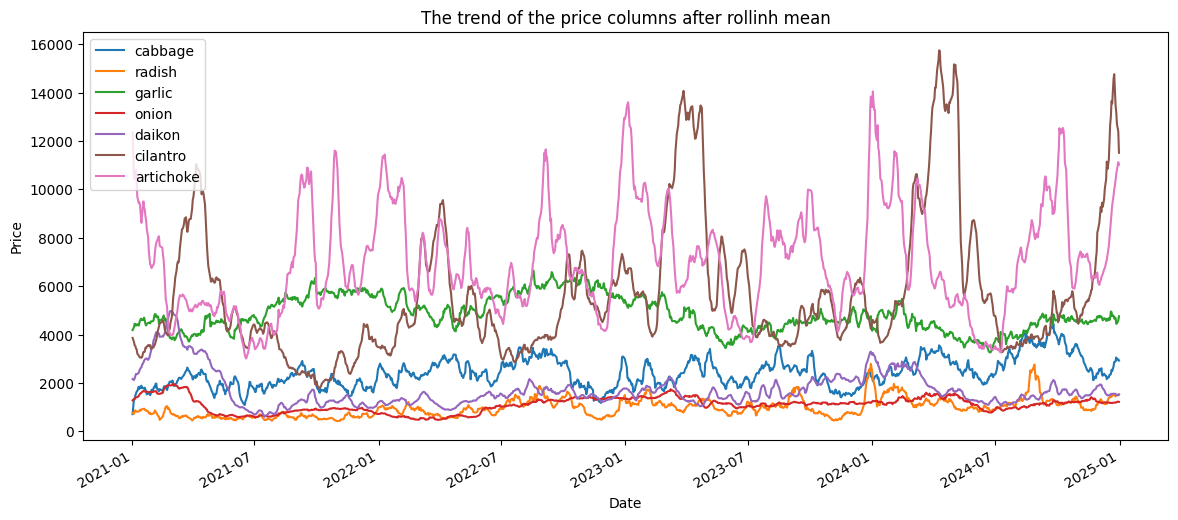

In [17]:
train_data_roll.set_index('date').plot(figsize = (14, 6))

plt.title("The trend of the price columns after rollinh mean")
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

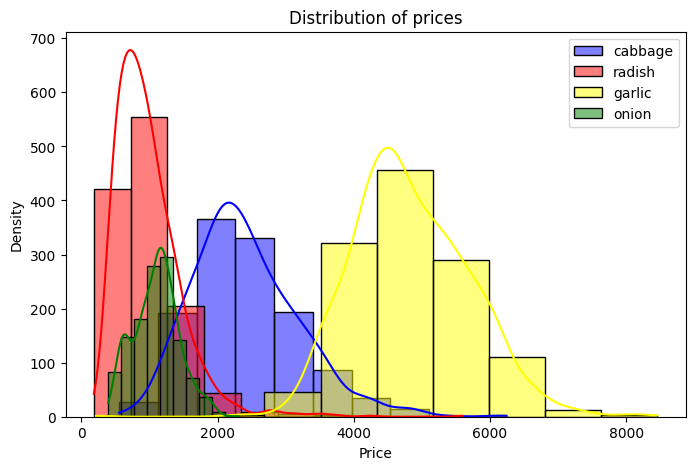

In [18]:
import seaborn as sns

plt.figure(figsize = (8, 5))

sns.histplot(train_data['cabbage'], bins = 10, kde = True, label = 'cabbage', color = 'blue', edgecolor = 'black')
sns.histplot(train_data['radish'], bins = 10, kde = True, label = 'radish', color = 'red', edgecolor = 'black')
sns.histplot(train_data['garlic'], bins = 10, kde = True, label = 'garlic', color = 'yellow', edgecolor = 'black')
sns.histplot(train_data['onion'], bins = 10, kde = True, label = 'onion', color = 'green', edgecolor = 'black')

plt.title('Distribution of prices', fontsize = 12)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend()
plt.show()

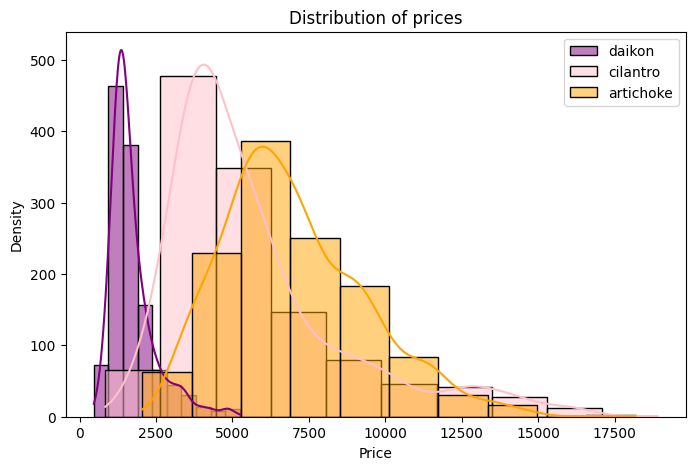

In [19]:
plt.figure(figsize = (8, 5))

sns.histplot(train_data['daikon'], bins = 10, kde = True, label = 'daikon', color = 'purple', edgecolor = 'black')
sns.histplot(train_data['cilantro'], bins = 10, kde = True, label = 'cilantro', color = 'pink', edgecolor = 'black')
sns.histplot(train_data['artichoke'], bins = 10, kde = True, label = 'artichoke', color = 'orange', edgecolor = 'black')

plt.title('Distribution of prices', fontsize = 12)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Density', fontsize = 10)
plt.legend()
plt.show()

In [20]:
train_data_analysis = train_data.copy()
train_data_analysis['date'] = pd.to_datetime(train_data['date'])
train_data_analysis['day'] = train_data['date'].dt.day_of_week
train_data_analysis['month'] = train_data['date'].dt.month

price_by_day = train_data_analysis.groupby("day")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)
price_by_month = train_data_analysis.groupby("month")[['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']].mean().round(2)

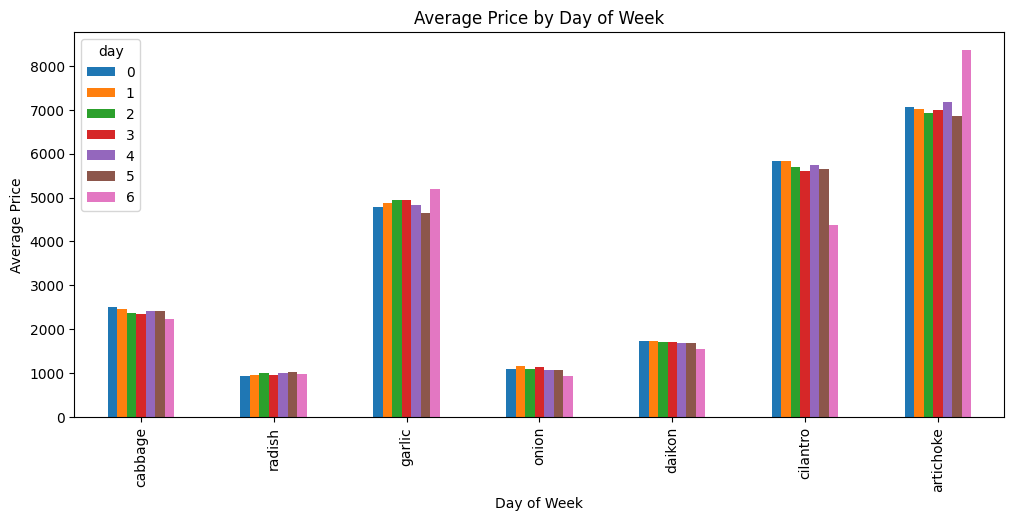

In [21]:
price_by_day.T.plot(kind = 'bar', figsize = (12, 5))
plt.title('Average Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.show()

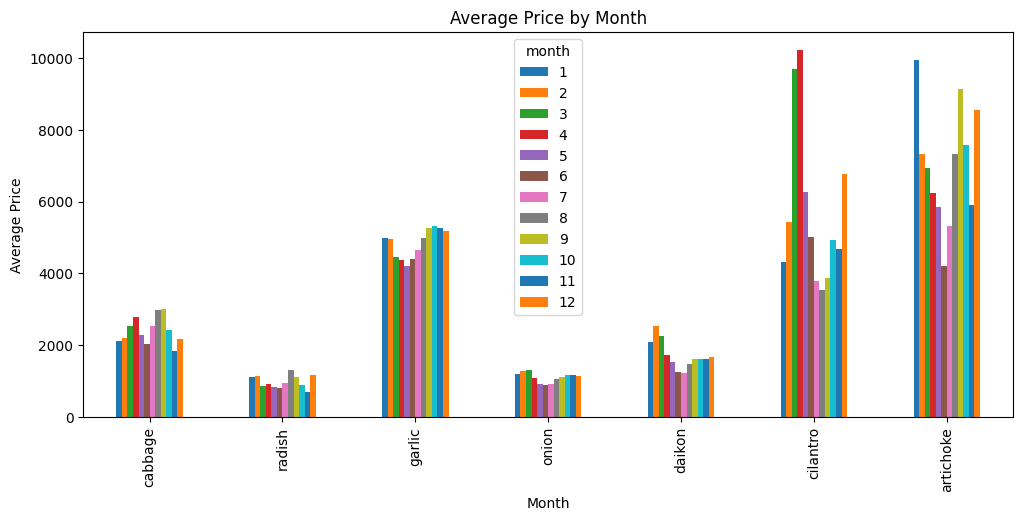

In [22]:
price_by_month.T.plot(kind = 'bar', figsize = (12, 5))

plt.title("Average Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

In [23]:
# Day, Month는 무시

cor_matrix_train = train_data_analysis.corr()[1:].drop('date', axis = 1)
cor_matrix_train.style.background_gradient(cmap = 'coolwarm')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,day,month
cabbage,1.000000,0.339659,-0.085639,0.053447,-0.050555,0.127825,0.259864,-0.036280,-0.000250
radish,0.339659,1.000000,-0.006457,0.200517,0.101324,0.080207,0.339039,0.053851,-0.007680
garlic,-0.085639,-0.006457,1.000000,-0.041142,-0.154355,-0.253576,0.221336,-0.033893,0.253794
onion,0.053447,0.200517,-0.041142,1.000000,0.559508,0.327882,0.151178,-0.051554,-0.064181
daikon,-0.050555,0.101324,-0.154355,0.559508,1.000000,0.107274,0.126964,-0.026526,-0.276781
cilantro,0.127825,0.080207,-0.253576,0.327882,0.107274,1.000000,-0.037530,-0.027409,-0.225754
artichoke,0.259864,0.339039,0.221336,0.151178,0.126964,-0.037530,1.000000,-0.000330,-0.015774
day,-0.036280,0.053851,-0.033893,-0.051554,-0.026526,-0.027409,-0.000330,1.000000,0.001071
month,-0.000250,-0.007680,0.253794,-0.064181,-0.276781,-0.225754,-0.015774,0.001071,1.000000


In [24]:
cor_matrix_test = test_data.corr()[1:].drop('date', axis = 1)
cor_matrix_test.style.background_gradient(cmap = 'coolwarm')

,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
cabbage,1.000000,-0.054484,-0.134288,0.021589,-0.252919,0.240053,-0.203422
radish,-0.054484,1.000000,-0.031106,0.230357,0.212456,-0.055945,0.030531
garlic,-0.134288,-0.031106,1.000000,0.192452,0.256041,0.133909,0.171338
onion,0.021589,0.230357,0.192452,1.000000,0.385015,-0.015521,-0.051188
daikon,-0.252919,0.212456,0.256041,0.385015,1.000000,-0.345792,0.396517
cilantro,0.240053,-0.055945,0.133909,-0.015521,-0.345792,1.000000,0.028393
artichoke,-0.203422,0.030531,0.171338,-0.051188,0.396517,0.028393,1.000000


## Construct baseline model

- 시계열 알고리즘과 ML 알고리즘 모두 구현해볼 예정
- 해당 데이터는 시계열 데이터로써 시계열 알고리즘의 성능도 어느정도 기대해볼 수 있음
- 시계열 알고리즘의 경우 Prophet을 사용 예정
- ML 알고리즘의 경우 Feature의 퀄리티에 따라 성능에 영향이 가기 때문에 Feature Engineering 과정이 중요
- ML 알고리즘의 경우 Linear Regression, Ridge, Lasso, RandomForest, LGBM, XGBOOST를 사용하여 사용자가 다양한 모델을 사용할 수 있도록 할 예정

### Prophet을 이용한 시계열 데이터 예측

In [25]:
# 이미 설치가 되었다면 주석처리하고 패스
# pip install prophet

import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)


# train dataset
print(train_data.head())

# test dataset
print(test_data.head())

        date  cabbage   radish   garlic    onion   daikon  cilantro  artichoke
0 2021-01-02   713.00   760.00  4182.76  1282.48  2163.33   3862.77   12340.35
1 2021-01-04  1946.90   708.50  4427.22  1381.92  2083.49   3539.80    8773.32
2 2021-01-05  1307.79   996.28  4731.48  1396.43  2316.91   3281.04   10148.78
3 2021-01-06  1942.60  1012.55  4420.99  1484.83  2555.18   3440.97   11108.13
4 2021-01-07  1872.97   694.47  4080.54  1488.01  2740.90   3018.87   11615.35
        date  cabbage   radish   garlic    onion   daikon  cilantro  artichoke
0 2025-01-02  4832.75  1217.56  5843.78  1408.03  1580.95  12188.33   14781.40
1 2025-01-03  3110.80  2309.07  4613.04  1281.47  1683.65  12823.14   11304.91
2 2025-01-04  2466.66  2308.51  4664.59  1355.17  1567.71  11395.75   11444.51
3 2025-01-06  3728.57  1671.05  4721.10  1308.74  1659.86  10287.87   12001.80
4 2025-01-07  2640.44  1926.03  5034.74  1430.88  1837.39   8227.55   10084.76


In [26]:
# 예측 대상 df 생성
start_dt= '2025-01-02'
end_dt = '2025-04-30'
forecast_df = pd.DataFrame({'date':pd.date_range(start = start_dt, end = end_dt)})
forecast_df

,date
0,2025-01-02
1,2025-01-03
2,2025-01-04
3,2025-01-05
4,2025-01-06
...,...
114,2025-04-26
115,2025-04-27
116,2025-04-28
117,2025-04-29


**해당 데이터에는 이미 휴일 및 일요일 날짜의 데이터가 빠져있기 때문에 따로 작업하지 않음</br>
만약 휴일과 관련된 데이터 들이있을 경우</br>
holiday 라이브러리를 import하여 휴일과 일요일에 대한 데이터를 처리**

In [27]:
# 품목별 반복하면서 예측 후 저장

for col in train_data.columns:
    if col != 'date':
        train_prophet = train_data[['date', col]].rename(columns = {'date': 'ds', col: 'y'})
        
        model_prophet = Prophet()
        model_prophet.fit(train_prophet)
        
        future_dates = pd.DataFrame(pd.date_range(start = start_dt, end = end_dt), columns = ['ds'])
        forecast = model_prophet.predict(future_dates)
        forecast = forecast.round(2)
        forecast_df[col + '_pred'] = forecast['yhat']

00:26:46 - cmdstanpy - INFO - Chain [1] start processing
00:26:47 - cmdstanpy - INFO - Chain [1] done processing
00:26:47 - cmdstanpy - INFO - Chain [1] start processing
00:26:47 - cmdstanpy - INFO - Chain [1] done processing
00:26:47 - cmdstanpy - INFO - Chain [1] start processing
00:26:47 - cmdstanpy - INFO - Chain [1] done processing
00:26:47 - cmdstanpy - INFO - Chain [1] start processing
00:26:47 - cmdstanpy - INFO - Chain [1] done processing
00:26:47 - cmdstanpy - INFO - Chain [1] start processing
00:26:47 - cmdstanpy - INFO - Chain [1] done processing
00:26:48 - cmdstanpy - INFO - Chain [1] start processing
00:26:48 - cmdstanpy - INFO - Chain [1] done processing
00:26:48 - cmdstanpy - INFO - Chain [1] start processing
00:26:48 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
forecast_df.head()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
0,2025-01-02,3189.32,1684.85,4428.27,1210.99,1436.55,7388.27,11846.43
1,2025-01-03,3246.85,1705.71,4310.12,1165.00,1408.19,7395.24,11978.47
2,2025-01-04,3252.01,1728.27,4131.92,1151.11,1379.71,7193.74,11643.78
3,2025-01-05,2891.39,1533.66,4362.05,1041.82,1110.61,7137.62,11596.99
4,2025-01-06,3315.39,1614.74,4242.45,1174.20,1370.42,7228.65,11672.06


In [29]:
forecast_df.tail()

,date,cabbage_pred,radish_pred,garlic_pred,onion_pred,daikon_pred,cilantro_pred,artichoke_pred
114,2025-04-26,3872.47,1474.13,3402.67,1042.96,969.29,11317.97,6782.86
115,2025-04-27,3491.93,1284.02,3636.67,927.17,718.61,11140.95,6797.62
116,2025-04-28,3897.35,1369.42,3519.37,1053.07,994.87,11109.75,6947.16
117,2025-04-29,3836.39,1373.37,3625.65,1099.88,980.50,10893.89,6900.44
118,2025-04-30,3728.40,1426.33,3689.21,1031.38,938.17,10590.46,6838.30


In [30]:
test_data.head()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2025-01-02,4832.75,1217.56,5843.78,1408.03,1580.95,12188.33,14781.40
1,2025-01-03,3110.80,2309.07,4613.04,1281.47,1683.65,12823.14,11304.91
2,2025-01-04,2466.66,2308.51,4664.59,1355.17,1567.71,11395.75,11444.51
3,2025-01-06,3728.57,1671.05,4721.10,1308.74,1659.86,10287.87,12001.80
4,2025-01-07,2640.44,1926.03,5034.74,1430.88,1837.39,8227.55,10084.76


In [31]:
test = test_data.merge(forecast_df, on=['date'], how = 'left')

In [32]:
# 품목별로 실제, 예측 값만 저장

prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
    dfs[p] = test[['date', p, p+'_pred']]
    
print("DataFrame for garlic")
print(dfs['garlic'].head())

DataFrame for garlic
        date   garlic  garlic_pred
0 2025-01-02  5843.78      4428.27
1 2025-01-03  4613.04      4310.12
2 2025-01-04  4664.59      4131.92
3 2025-01-06  4721.10      4242.45
4 2025-01-07  5034.74      4348.21


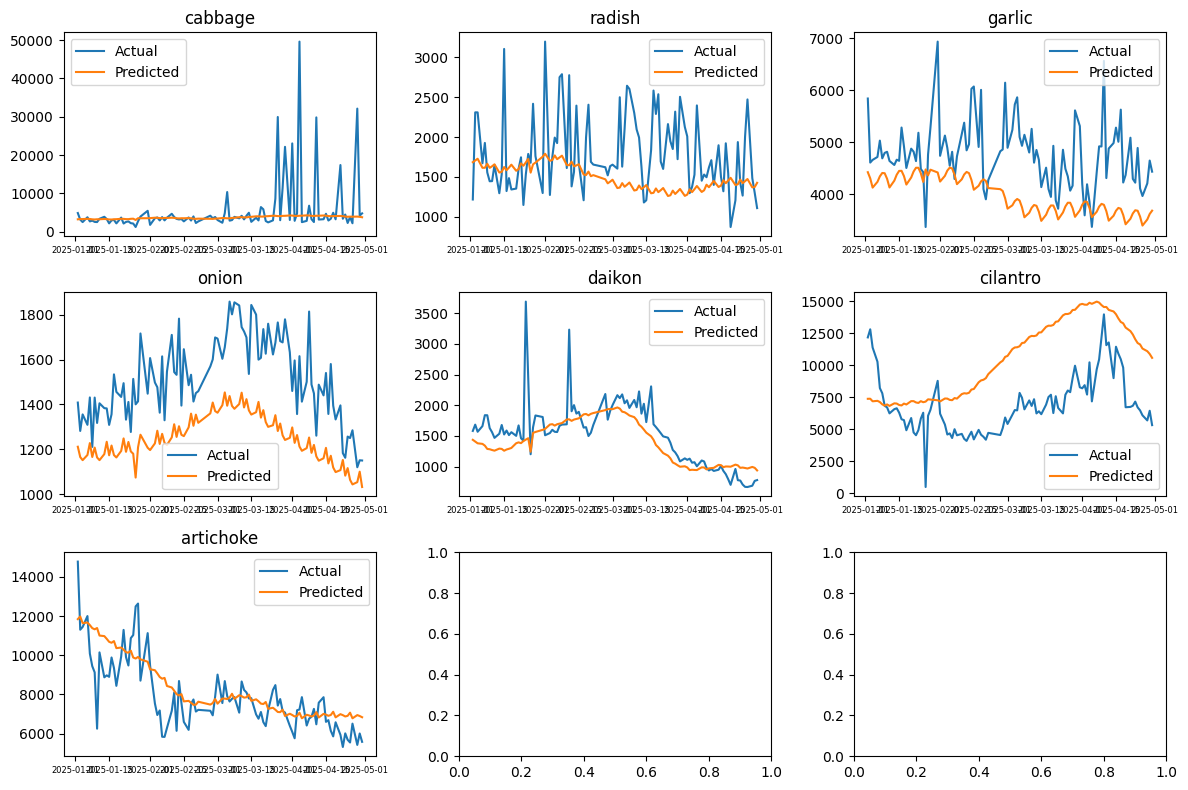

In [33]:
# 픔목별 예측값 vs 실제값 시각화
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize = (12,8))
axes = axes.flatten()

# 품목 목록
products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

for i, (prd, ax) in enumerate(zip(products, axes)):
    df = dfs[prd]
    ax.plot(df['date'], df[prd], label = 'Actual')
    ax.plot(df['date'], df[prd+'_pred'], label = 'Predicted')
    ax.set_title(prd)
    ax.legend()
    ax.tick_params(axis = 'x', labelsize = 6)
    
plt.tight_layout()
plt.show()

- Post Processing 진행하려 했지만 해당 데이터에는 휴일(일요일, 공휴일 등)의 데이터가 부재</br>또한 모든 농산물의 가격이 동일한 시기에 오르거나 내려가지 않고 따로따로 변동되는것으로 보아 크게 영향을 주는 event가 없다고 판단

In [34]:
prd = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
dfs = {}
for p in prd:
  dfs[p] =  test[['date', p, p+'_pred']]
  dfs[p]['gap'] = dfs[p][p] - dfs[p][p+'_pred']
  dfs[p]['abs_gap'] = abs(dfs[p][p] - dfs[p][p+'_pred'])
  dfs[p]['ape'] = dfs[p]['abs_gap'] / dfs[p][p]
  dfs[p]['ape_median'] = 1 - dfs[p]['ape'].median()

for p in prd:
  print(f"{p}: APE Median = {dfs[p]['ape_median'][0]}")

cabbage: APE Median = 0.7405165845403318
radish: APE Median = 0.8259838596460858
garlic: APE Median = 0.8490599994739403
onion: APE Median = 0.8328846182415658
daikon: APE Median = 0.8763204036643192
cilantro: APE Median = 0.318558770276123
artichoke: APE Median = 0.9019223199938551


- APE Median 값을 1에서 빼주어 높은 값일 수록 정확도가 올라가는 것으로 표현
- cilantro를 제외하고는 전부 안정적인 수치를 보여줌

### Feature Engineering for ML

In [71]:
# 훈령용 데이터셋 준비
train_data = pd.read_csv('train_set.csv', index_col = 0)
# 검증 데이터셋 준비
test_data = pd.read_csv('test_set.csv', index_col = 0)

In [72]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data = test_data[test_data['date'].dt.month != 5]
test_data.tail()

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
93,2025-04-25,3760.42,2004.59,4116.21,1249.71,670.54,6485.02,5548.51
94,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
95,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
96,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32
97,2025-04-30,4740.45,1109.83,4438.43,1149.61,780.90,5330.21,5582.41


- ML 모델들을 사용하기 위해선 수집되지 않은 휴일 데이터들을 보간해주어야할 필요가 있음
- 시계열 데이터에선 더 넓은 의미로 결측치 처리 과정이라고 볼 수 있음

In [73]:
import holidays

def add_missing_holidays_and_sundays(df, date_column_name):
    """
    와이드 포맷 데이터에 누락된 공휴일(1월 1일 포함 조정) 및 모든 일요일을 행으로 추가하는 함수.

    Args:
        df (pd.DataFrame): 원본 데이터프레임 (와이드 포맷).
        date_column_name (str): 날짜 정보가 담긴 컬럼의 이름.

    Returns:
        pd.DataFrame: 누락된 공휴일/일요일 행이 추가되고 날짜순으로 정렬된 데이터프레임.
    """
    if df.empty:
        print("입력된 데이터프레임이 비어있습니다.")
        return df

    df_copy = df.copy()
    try:
        df_copy[date_column_name] = pd.to_datetime(df_copy[date_column_name], errors='raise') # 에러 발생시 중단
    except Exception as e:
        print(f"'{date_column_name}' 컬럼을 datetime으로 변환 중 오류 발생: {e}. 날짜 형식을 확인해주세요.")
        return df # 원본 반환

    # NaT 값 제거 (만약 errors='coerce'를 쓴다면 필요)
    # df_copy = df_copy.dropna(subset=[date_column_name])
    # if df_copy.empty:
    #     print(f"'{date_column_name}' 컬럼에 유효한 날짜가 없습니다.")
    #     return df

    data_min_date = df_copy[date_column_name].min()
    data_max_date = df_copy[date_column_name].max()

    if pd.isna(data_min_date) or pd.isna(data_max_date):
        print("데이터의 날짜 범위를 확인할 수 없습니다 (min/max가 NaT).")
        return df_copy # 또는 원본 df

    print(f"데이터 원본 날짜 범위: {data_min_date.strftime('%Y-%m-%d')} ~ {data_max_date.strftime('%Y-%m-%d')}")

    existing_dates = set(df_copy[date_column_name])
    item_price_columns = [col for col in df_copy.columns if col != date_column_name]
    all_new_rows = []

    # 1. 해당 연도들의 공식 공휴일 가져오기
    official_holidays_set = set()
    try:
        # 데이터가 걸쳐있는 모든 연도의 공휴일을 가져옴
        years_in_data = list(range(data_min_date.year, data_max_date.year + 1))
        if years_in_data: # years_in_data가 비어있지 않은 경우에만 실행
            kr_hols = holidays.KR(years=years_in_data)
            for date_obj, name in kr_hols.items():
                official_holidays_set.add(pd.to_datetime(date_obj))
            print(f"{len(official_holidays_set)}개의 공식 공휴일 발견 (연도 범위: {min(years_in_data)}-{max(years_in_data)})")
        else:
            print("데이터에서 유효한 연도 범위를 찾을 수 없어 공휴일을 가져오지 못했습니다.")

    except Exception as e:
        print(f"공식 공휴일 정보를 가져오는 중 오류 발생: {e}")

    # 2. 추가할 날짜의 유효 범위 설정 (1월 1일 특별 고려)
    # 기본적으로 데이터의 실제 시작일과 종료일을 기준으로 하되,
    # 데이터가 1월 1일 직후에 시작하면 1월 1일도 포함시키도록 시작일 조정
    effective_start_date_for_check = data_min_date
    # 만약 데이터 시작일이 해당 연도 1월이고, 1일 이후이며, 1월 1일이 공휴일이라면 시작일을 1월 1일로 조정
    if data_min_date.month == 1 and data_min_date.day > 1:
        jan_first_of_min_year = pd.Timestamp(year=data_min_date.year, month=1, day=1)
        if jan_first_of_min_year in official_holidays_set: # 공식 공휴일인지 확인
            effective_start_date_for_check = jan_first_of_min_year
            print(f"데이터 시작일({data_min_date.strftime('%Y-%m-%d')})이 1월 1일 이후이므로, 유효 시작일을 {effective_start_date_for_check.strftime('%Y-%m-%d')}로 조정합니다.")

    print(f"데이터 추가를 위한 유효 날짜 범위: {effective_start_date_for_check.strftime('%Y-%m-%d')} ~ {data_max_date.strftime('%Y-%m-%d')}")

    # 3. 유효 범위 내의 모든 일요일 가져오기
    sundays_set = set()
    # effective_start_date_for_check 부터 data_max_date 까지의 모든 날짜를 순회하며 일요일 찾기
    # (두 날짜가 유효할 때만)
    if not (pd.isna(effective_start_date_for_check) or pd.isna(data_max_date)):
        current_iter_date = effective_start_date_for_check
        while current_iter_date <= data_max_date:
            if current_iter_date.dayofweek == 6: # 0:월요일, 6:일요일
                sundays_set.add(current_iter_date)
            current_iter_date += pd.Timedelta(days=1)
        print(f"{len(sundays_set)}개의 일요일 발견 (유효 범위 내)")


    # 4. 추가할 후보 날짜들 통합 (공식 공휴일 + 일요일)
    # 공식 공휴일 중에서도 effective_start_date_for_check 와 data_max_date 범위 내에 있는 것만 고려
    candidate_dates = {h for h in official_holidays_set if effective_start_date_for_check <= h <= data_max_date}
    candidate_dates.update(sundays_set) # 일요일은 이미 위에서 범위 필터링됨
    
    sorted_candidate_dates = sorted(list(candidate_dates))
    print(f"총 {len(sorted_candidate_dates)}개의 추가 후보 날짜 (공식 공휴일 + 일요일, 중복 제거 및 범위 필터링됨)")


    # 5. 최종적으로 행 추가 작업
    added_dates_count = 0
    for date_to_check in sorted_candidate_dates:
        # 이미 존재하는 날짜는 건너뛰고, 최종 유효 범위 내의 날짜만 추가
        # (sorted_candidate_dates는 이미 effective_start_date_for_check 와 data_max_date 범위 내의 날짜들임)
        if date_to_check not in existing_dates:
            new_row = {date_column_name: date_to_check}
            for item_col in item_price_columns:
                new_row[item_col] = np.nan
            all_new_rows.append(new_row)
            added_dates_count +=1
            # print(f"추가됨: {date_to_check.strftime('%Y-%m-%d')}") # 필요시 확인용

    print(f"실제로 추가된 새 행의 수: {added_dates_count}")

    if all_new_rows:
        new_rows_df = pd.DataFrame(all_new_rows)
        if not new_rows_df.empty: # new_rows_df가 비어있지 않을 때만 컬럼 순서 조정
             new_rows_df = new_rows_df[df_copy.columns.tolist()] # 컬럼 순서 맞추기

        df_final = pd.concat([df_copy, new_rows_df], ignore_index=True)
    else:
        df_final = df_copy

    df_final = df_final.sort_values(by=[date_column_name]).reset_index(drop=True)
    return df_final

In [77]:
train_data['date'] = pd.to_datetime(train_data['date'])

train_data_full = add_missing_holidays_and_sundays(train_data, 'date')

test_data_full = add_missing_holidays_and_sundays(test_data, 'date')

데이터 원본 날짜 범위: 2021-01-02 ~ 2024-12-31
73개의 공식 공휴일 발견 (연도 범위: 2021-2024)
데이터 시작일(2021-01-02)이 1월 1일 이후이므로, 유효 시작일을 2021-01-01로 조정합니다.
데이터 추가를 위한 유효 날짜 범위: 2021-01-01 ~ 2024-12-31
209개의 일요일 발견 (유효 범위 내)
총 271개의 추가 후보 날짜 (공식 공휴일 + 일요일, 중복 제거 및 범위 필터링됨)
실제로 추가된 새 행의 수: 215
데이터 원본 날짜 범위: 2025-01-02 ~ 2025-04-30
17개의 공식 공휴일 발견 (연도 범위: 2025-2025)
데이터 시작일(2025-01-02)이 1월 1일 이후이므로, 유효 시작일을 2025-01-01로 조정합니다.
데이터 추가를 위한 유효 날짜 범위: 2025-01-01 ~ 2025-04-30
17개의 일요일 발견 (유효 범위 내)
총 23개의 추가 후보 날짜 (공식 공휴일 + 일요일, 중복 제거 및 범위 필터링됨)
실제로 추가된 새 행의 수: 19


In [78]:
train_data_full

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78
...,...,...,...,...,...,...,...,...
1456,2024-12-27,3642.66,1545.93,4674.20,1200.78,1503.53,10328.21,11454.85
1457,2024-12-28,2941.62,1325.48,4317.21,1292.75,1396.15,12691.50,11325.36
1458,2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,2024-12-30,2287.54,2270.71,4904.38,1167.73,1566.44,10164.39,11842.47


In [79]:
test_data_full

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke
0,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02,4832.75,1217.56,5843.78,1408.03,1580.95,12188.33,14781.40
2,2025-01-03,3110.80,2309.07,4613.04,1281.47,1683.65,12823.14,11304.91
3,2025-01-04,2466.66,2308.51,4664.59,1355.17,1567.71,11395.75,11444.51
4,2025-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
112,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69
113,2025-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83
115,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32


In [81]:
def fill_missing_prices(df_with_nans, date_column_name):
    """
    날짜별로 펼쳐진 와이드 포맷 데이터에서 NaN으로 표시된 휴일 및 주말 가격을
    다음 규칙에 따라 채우는 함수:
    1. 1월 1일의 NaN은 bfill (다음 유효한 날의 값으로 채움).
    2. 그 외의 NaN (다른 공휴일, 일요일 등)은 ffill (이전 유효한 날의 값으로 채움).

    Args:
        df_with_nans (pd.DataFrame): 휴일/일요일 행이 NaN으로 추가된 데이터프레임.
        date_column_name (str): 날짜 컬럼의 이름.

    Returns:
        pd.DataFrame: NaN 값이 규칙에 따라 채워진 데이터프레임.
    """
    if df_with_nans.empty:
        print("입력된 데이터프레임이 비어있습니다.")
        return df_with_nans

    df_filled = df_with_nans.copy()

    # 날짜 컬럼을 인덱스로 설정 (ffill/bfill 작업을 용이하게 하기 위해)
    # 만약 이미 인덱스라면 이 부분은 스킵될 수 있도록 처리
    is_date_col_in_columns = date_column_name in df_filled.columns
    if is_date_col_in_columns:
        try:
            # 날짜 컬럼 타입 확인 및 변환 (이미 datetime이어야 하지만 안전장치)
            if not pd.api.types.is_datetime64_any_dtype(df_filled[date_column_name]):
                df_filled[date_column_name] = pd.to_datetime(df_filled[date_column_name])
            df_filled = df_filled.set_index(date_column_name)
        except Exception as e:
            print(f"'{date_column_name}'을 인덱스로 설정 중 오류: {e}. 날짜 컬럼을 확인해주세요.")
            return df_with_nans # 원본 반환

    # 가격 정보를 담고 있는 컬럼들 (날짜 인덱스를 제외한 모든 컬럼)
    price_columns = df_filled.columns.tolist()

    if not price_columns:
        print("가격 데이터 컬럼이 없습니다.")
        if is_date_col_in_columns: # 인덱스를 원래대로 되돌리기 시도
            df_filled = df_filled.reset_index()
        return df_filled


    print("NaN 채우기 시작...")
    # 1. 1월 1일 NaN 값에 대해 bfill 적용
    # 각 가격 컬럼별로 처리
    jan_1st_mask = (df_filled.index.month == 1) & (df_filled.index.day == 1)
    
    if jan_1st_mask.any(): # 1월 1일이 인덱스에 하나라도 있다면
        print("1월 1일 데이터 bfill 처리 중...")
        for col in price_columns:
            # 해당 컬럼에서 1월 1일이면서 NaN인 위치를 찾음
            nan_on_jan_1st_for_col = df_filled[col].isna() & jan_1st_mask
            
            if nan_on_jan_1st_for_col.any():
                # bfill을 전체 컬럼에 적용해서 채울 값들을 미리 준비
                bfilled_column_values = df_filled[col].bfill()
                # 해당 위치에만 bfill된 값을 적용
                df_filled.loc[nan_on_jan_1st_for_col, col] = bfilled_column_values[nan_on_jan_1st_for_col]
                # print(f"  컬럼 '{col}'의 1월 1일 NaN이 bfill 처리됨.")
    else:
        print("데이터 인덱스에 1월 1일이 없어 bfill 처리를 건너뜁니다.")


    # 2. 나머지 모든 NaN 값에 대해 ffill 적용
    print("기타 휴일 및 일요일 데이터 ffill 처리 중...")
    df_filled[price_columns] = df_filled[price_columns].ffill()
    
    # (선택적) ffill 후에도 맨 처음에 NaN이 남아있을 수 있음 (예: 전체 데이터 시작이 휴일인 경우)
    # 이 경우 bfill을 한 번 더 약하게 전체적으로 적용해볼 수 있지만, 현재 요구사항은 아님.
    # df_filled[price_columns] = df_filled[price_columns].bfill(limit=1) # 예시: 맨 앞 NaN만 한번 더 채우기

    print("NaN 채우기 완료.")

    # 날짜 인덱스를 다시 컬럼으로 되돌리기 (원본 데이터프레임 형태 유지)
    if is_date_col_in_columns:
        df_filled = df_filled.reset_index()

    return df_filled

In [87]:
train_filled = fill_missing_prices(train_data_full, 'date')

test_filled = fill_missing_prices(test_data_full, 'date')

NaN 채우기 시작...
1월 1일 데이터 bfill 처리 중...
기타 휴일 및 일요일 데이터 ffill 처리 중...
NaN 채우기 완료.
NaN 채우기 시작...
1월 1일 데이터 bfill 처리 중...
기타 휴일 및 일요일 데이터 ffill 처리 중...
NaN 채우기 완료.


In [88]:
train_filled.isna().sum()

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64

In [89]:
test_filled.isna().sum()

date         0
cabbage      0
radish       0
garlic       0
onion        0
daikon       0
cilantro     0
artichoke    0
dtype: int64

In [90]:
# 편의를 위해 학습 데이터와 테스트 데이터를 concat를 사용해서 합치기
data = pd.concat([train_filled, test_filled]).reset_index(drop=True)

print(data.head())
print(data.tail())

        date  cabbage  radish   garlic    onion   daikon  cilantro  artichoke
0 2021-01-01   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
1 2021-01-02   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
2 2021-01-03   713.00  760.00  4182.76  1282.48  2163.33   3862.77   12340.35
3 2021-01-04  1946.90  708.50  4427.22  1381.92  2083.49   3539.80    8773.32
4 2021-01-05  1307.79  996.28  4731.48  1396.43  2316.91   3281.04   10148.78
           date   cabbage   radish   garlic    onion  daikon  cilantro  \
1573 2025-04-26   2156.31  2470.71  3970.21  1284.41  668.11   6097.55   
1574 2025-04-27   2156.31  2470.71  3970.21  1284.41  668.11   6097.55   
1575 2025-04-28  32127.52  1485.51  4212.23  1119.54  689.10   5698.70   
1576 2025-04-29   4154.87  1302.11  4651.40  1150.63  767.71   6454.00   
1577 2025-04-30   4740.45  1109.83  4438.43  1149.61  780.90   5330.21   

      artichoke  
1573    6511.69  
1574    6511.69  
1575    5424.83  
1576    6009.32

In [91]:
def add_date_features(data):
  """
  dataset에 날짜와 관련된 feature를 생성
  args:
    dataset
  return:
    features 포함된 dataset
  """
  # 날짜 기반 파생변수 생성
  data['year'] = data['date'].dt.year
  data['month'] = data['date'].dt.month
  data['day'] = data['date'].dt.day
  data['day_of_week'] = data['date'].dt.dayofweek
  data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

  # 공휴일 변수
  kr_holidays = holidays.KR(years = data['year'].unique())
  data['is_holiday'] = data['date'].isin(kr_holidays).astype(int)

  return data

In [93]:
data = add_date_features(data)
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,day,day_of_week,is_weekend,is_holiday
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,1,4,0,1
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,2,5,1,0
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,3,6,1,0
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,4,0,0,0
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,26,5,1,0
1574,2025-04-27,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,27,6,1,0
1575,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83,2025,4,28,0,0,0
1576,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32,2025,4,29,1,0,0


In [94]:
def add_lagging_feature(data, window=7):
  """
  예측값의 과거 t-1, .. t-n 까지의 데이터를 추가
  args:
    dataset,
    window = 7 as defaullt
  return:
    features 포함된 dataset
  """
  data = data.copy()

  products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']
  for product in products:
    data[f'{product}_lag_{window}'] = data[product].shift(window)
  return data

In [95]:
data = add_lagging_feature(data, window = 7)
data = add_lagging_feature(data, window = 14)
data.head(30)

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,daikon_lag_7,cilantro_lag_7,artichoke_lag_7,cabbage_lag_14,radish_lag_14,garlic_lag_14,onion_lag_14,daikon_lag_14,cilantro_lag_14,artichoke_lag_14
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-01-06,1942.60,1012.55,4420.99,1484.83,2555.18,3440.97,11108.13,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-07,1872.97,694.47,4080.54,1488.01,2740.90,3018.87,11615.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-08,2091.30,718.38,4562.64,1423.30,2358.48,3183.15,7231.71,2021,1,...,2163.33,3862.77,12340.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-09,1786.48,804.76,4579.95,1427.90,2388.88,2152.83,6631.57,2021,1,...,2163.33,3862.77,12340.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-10,1786.48,804.76,4579.95,1427.90,2388.88,2152.83,6631.57,2021,1,...,2163.33,3862.77,12340.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
def add_rolling_mean(data, window = 7):
  """
  7일간의 품목의 가격의 avg와 std를 구함
  변동성이 큰 가격을 갖는 품목에 대한 rolling mean을 계산
  args:
    dataset,
    window = 7 as default
  return:
    features 포함된 dataset
  """
  products = ['cabbage', 'radish', 'garlic', 'onion', 'daikon', 'cilantro', 'artichoke']

  for product in products:
    data[f'{product}_rolling_mean'] = data[product].rolling(window = window).mean()
    data[f'{product}_rolling_std'] = data[product].rolling(window = window).std()

  return data

In [97]:
data = add_rolling_mean(data)
data

,date,cabbage,radish,garlic,onion,daikon,cilantro,artichoke,year,month,...,garlic_rolling_mean,garlic_rolling_std,onion_rolling_mean,onion_rolling_std,daikon_rolling_mean,daikon_rolling_std,cilantro_rolling_mean,cilantro_rolling_std,artichoke_rolling_mean,artichoke_rolling_std
0,2021-01-01,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,713.00,760.00,4182.76,1282.48,2163.33,3862.77,12340.35,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,1946.90,708.50,4427.22,1381.92,2083.49,3539.80,8773.32,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-05,1307.79,996.28,4731.48,1396.43,2316.91,3281.04,10148.78,2021,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,2025-04-26,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,...,4424.548571,412.866548,1266.124286,81.414174,752.140000,102.563520,6685.188571,329.806906,5942.805714,473.711831
1574,2025-04-27,2156.31,2470.71,3970.21,1284.41,668.11,6097.55,6511.69,2025,4,...,4366.861429,447.833391,1259.217143,76.735145,747.091429,106.166193,6595.185714,395.696617,5933.012857,458.812408
1575,2025-04-28,32127.52,1485.51,4212.23,1119.54,689.10,5698.70,5424.83,2025,4,...,4241.371429,314.409712,1219.795714,65.052241,708.145714,48.832646,6444.308571,509.624803,5859.415714,497.215251
1576,2025-04-29,4154.87,1302.11,4651.40,1150.63,767.71,6454.00,6009.32,2025,4,...,4291.662857,351.230447,1215.250000,69.083661,706.558571,46.265863,6388.497143,478.939257,5958.121429,436.823755


In [100]:
def split_data(data, std_date = '2025-01-01'):
  """
  Feature Engineering을 편하게 하기 위해 합쳤던 dataset을 다시 나누는 과정
  특정 날짜(test_data의 시작 날짜)를 기준으로 train, test dataset을 나누기
  args:
    dataset
  return:
    train, test dataset
  """
  data = data.dropna()
  train_data = data.query("date < @std_date")
  test_data = data.query("date >= @std_date")

  print("Train set shape:", train_data.shape)
  print("Test set shape:", test_data.shape)
  return train_data, test_data

In [101]:
train_data, test_data = split_data(data)

Train set shape: (1447, 42)
Test set shape: (117, 42)
